In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NL_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,NaN,0.0,0.32,NaN,0.00,0.00,0.00,0.00,...,NaN,NaN,0.000,0.0,0.778,0.000,0.000,3.756,NaN,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,NaN,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,NaN,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,NaN,0.00,0.0,1.85,0.00,0.00,1.85,NaN,0.00,...,NaN,NaN,0.223,0.0,0.000,0.000,0.000,NaN,15.0,54.0
4,0.00,0.00,0.00,0.0,NaN,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,NaN,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,NaN,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,NaN,0.00,0.00,...,0.0,0.0,0.136,NaN,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	464
float64		column 2	294
float64		column 3	522
float64		column 4	555
float64		column 5	381
float64		column 6	522
float64		column 7	522
float64		column 8	497
float64		column 9	410
float64		column 10	497
float64		column 11	319
float64		column 12	348
float64		column 13	410
float64		column 14	410
float64		column 15	497
float64		column 16	522
float64		column 17	580
float64		column 18	555
float64		column 19	439
float64		column 20	609
float64		column 21	555
float64		column 22	348
float64		column 23	555
float64		column 24	377
float64		column 25	555
float64		column 26	439
float64		column 27	435
float64		column 28	435
float64		column 29	410
float64		column 30	522
float64		column 31	406
float64		column 32	468
float64		column 33	435
float64		column 34	381
float64		column 35	435
float64		column 36	435
float64		column 37	319
float64		column 38	377
float64		column 39	584
float64		column 40	410
float64		column 41	348
float64		column 42	265
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4133.000000,4303.000000,4075.000000,4042.000000,4216.000000,4075.000000,4075.000000,4100.000000,4187.000000,4100.000000,...,4187.000000,4075.000000,4220.000000,4104.000000,4133.000000,4133.000000,4100.000000,4133.000000,4133.000000,4071.000000
mean,0.097464,0.207416,0.263337,0.066554,0.302327,0.088331,0.105497,0.102980,0.083358,0.230217,...,0.031151,0.032832,0.134655,0.015839,0.256767,0.073686,0.041474,4.950299,50.812001,271.384426
std,0.286975,1.277039,0.484068,1.448451,0.666613,0.262856,0.383909,0.409707,0.270793,0.647869,...,0.292864,0.217980,0.261397,0.111939,0.768907,0.252080,0.433989,30.832567,198.605279,596.740196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.605000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.310000,15.000000,97.000000
75%,0.000000,0.000000,0.380000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.130000,...,0.000000,0.000000,0.183000,0.000000,0.306000,0.045000,0.000000,3.758000,43.000000,262.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

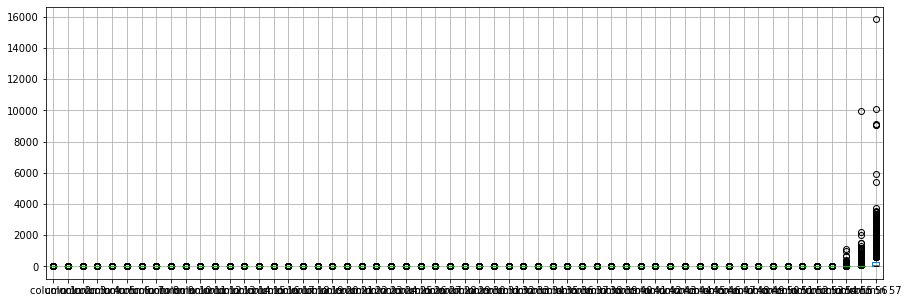

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.097464
column 2       0.207416
column 3       0.263337
column 4       0.066554
column 5       0.302327
column 6       0.088331
column 7       0.105497
column 8       0.102980
column 9       0.083358
column 10      0.230217
column 11      0.055145
column 12      0.523528
column 13      0.088861
column 14      0.057829
column 15      0.045602
column 16      0.224780
column 17      0.131013
column 18      0.165839
column 19      1.658420
column 20      0.076081
column 21      0.783714
column 22      0.121466
column 23      0.093911
column 24      0.087858
column 25      0.471400
column 26      0.241847
column 27      0.702996
column 28      0.115320
column 29      0.096472
column 30      0.091730
column 31      0.058530
column 32      0.042221
column 33      0.089704
column 34      0.042384
column 35      0.098515
column 36      0.091776
column 37      0.130446
column 38      0.011931
column 39      0.072263
column 40      0.059104
column 41      0.042415
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.012906,0.080693,-0.002732,0.025703,0.068390,0.006358,-0.005751,0.099687,0.045536,...,-0.021372,-0.019744,-0.014386,-0.037358,0.068152,0.107800,-0.005890,0.035226,0.047380,0.088191
column 2,-0.012906,1.000000,-0.034076,-0.006211,-0.027159,-0.023952,0.001343,-0.015919,-0.003896,0.021448,...,-0.015991,-0.006430,-0.048196,-0.016572,-0.012933,-0.008231,0.004299,0.006755,0.002990,-0.020827
column 3,0.080693,-0.034076,1.000000,-0.020212,0.079542,0.089753,0.026262,0.000623,0.080467,0.037745,...,-0.026574,-0.029588,-0.007250,-0.036519,0.095452,0.089101,-0.002287,0.071479,0.090587,0.072117
column 4,-0.002732,-0.006211,-0.020212,1.000000,0.006656,-0.012034,0.023291,0.013053,0.000531,-0.004421,...,-0.000506,-0.002064,-0.009478,-0.006345,-0.003565,0.007138,-0.000613,0.003374,0.017241,0.023158
column 5,0.025703,-0.027159,0.079542,0.006656,1.000000,0.040373,0.123397,0.030736,0.024954,0.027673,...,-0.029667,-0.028398,-0.042231,-0.018269,0.021498,0.037747,0.008117,0.035558,0.039616,-0.003345
column 6,0.068390,-0.023952,0.089753,-0.012034,0.040373,1.000000,0.039091,0.087879,0.106830,0.009200,...,-0.031790,-0.009477,-0.005435,-0.014648,0.052036,0.096429,0.020424,-0.008809,0.073006,0.071245
column 7,0.006358,0.001343,0.026262,0.023291,0.123397,0.039091,1.000000,0.018928,0.037100,0.034333,...,-0.028338,-0.028728,-0.054009,-0.024245,0.054607,0.054357,0.046031,0.029881,0.049026,-0.011154
column 8,-0.005751,-0.015919,0.000623,0.013053,0.030736,0.087879,0.018928,1.000000,0.096658,0.071073,...,-0.021316,-0.022019,-0.026529,-0.017448,0.028170,0.047621,-0.007054,0.002926,0.031852,0.033519
column 9,0.099687,-0.003896,0.080467,0.000531,0.024954,0.106830,0.037100,0.096658,1.000000,0.146131,...,-0.026869,-0.007191,-0.028868,0.011690,0.040755,0.131769,-0.002362,0.093398,0.157557,0.209389
column 10,0.045536,0.021448,0.037745,-0.004421,0.027673,0.009200,0.034333,0.071073,0.146131,1.000000,...,-0.014904,0.013330,0.005281,0.004551,0.031996,0.074816,0.042193,0.068310,0.157991,0.093464


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+30,17+30+30,17+30+30+30,17+30+30,17+30,17], vae_layer = False, seed = 300)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 573.8994947426826
Epoch: 1 , loss: 566.8111745588456
Epoch: 2 , loss: 570.1693215187419
Epoch: 3 , loss: 569.9017907385212
Epoch: 4 , loss: 565.1406487122646
Epoch: 5 , loss: 571.5386771757013
Epoch: 6 , loss: 570.7431563533557
Epoch: 7 , loss: 574.2722883590008
Epoch: 8 , loss: 571.4890592355762
Epoch: 9 , loss: 561.3377091411098
Epoch: 10 , loss: 565.2131040087976
Epoch: 11 , loss: 553.6400855725651
Epoch: 12 , loss: 495.1484490371332
Epoch: 13 , loss: 455.7993038323698
Epoch: 14 , loss: 452.92667888681234
Epoch: 15 , loss: 440.2073575328867
Epoch: 16 , loss: 433.05874224406915
Epoch: 17 , loss: 445.01698122456514
Epoch: 18 , loss: 420.67791043590586
Epoch: 19 , loss: 419.66086921293146
Epoch: 20 , loss: 419.21703455589375
Epoch: 21 , loss: 420.92465356168844
Epoch: 22 , loss: 416.4700941026003
Epoch: 23 , loss: 408.8594535003556
Epoch: 24 , loss: 414.6043193697514
Epoch: 25 , loss: 413.6753563963993

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.043274
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.524004
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.156096
column 19     0.000000
column 20     0.000000
column 21     0.621579
column 22    -0.013973
column 23     0.048402
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.055725
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.00000,-0.396237,0.0,0.000000,0.006055,0.000000,0.000000,0.000000,0.000000,...,0.035886,-0.080236,0.0,0.000000,0.000000,0.0,0.0,0.000000,-48.2764,0.00000
1,0.0,0.00000,0.000000,0.0,0.000000,0.000000,-0.119289,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.00000
2,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.551369,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.00000
3,0.0,0.26614,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.035956,0.000000,...,-0.028374,0.017631,0.0,0.000000,0.000000,0.0,0.0,-1.492259,0.0000,0.00000
4,0.0,0.00000,0.000000,0.0,-1.697059,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.608109,0.0000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,-0.929808,0.0,0.0,0.000000,0.0000,0.00000
4593,0.0,0.00000,0.108723,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.00000
4594,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-0.114925,0.000000,0.000000,...,0.000000,0.000000,0.0,0.053881,0.000000,0.0,0.0,0.000000,0.0000,0.00000
4595,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

16515.9641179184

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3480074303204131

In [19]:
new_df.iloc[66,:]

column 1      -0.017505
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15     -0.102368
column 16      0.440000
column 17      0.000000
column 18      0.004093
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.142705
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.043874
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64000,0.243763,0.0,0.320000,0.006055,0.000000,0.000000,0.000000,0.000000,...,0.035886,-0.080236,0.000,0.000000,0.778000,0.000,0.000,3.756000,12.7236,278.00000
1,0.21,0.28000,0.500000,0.0,0.140000,0.280000,0.090711,0.070000,0.000000,0.940000,...,0.000000,0.000000,0.132,0.000000,0.372000,0.180,0.048,5.114000,101.0000,1028.00000
2,0.00,0.00000,0.000000,0.0,0.630000,0.000000,0.310000,0.630000,0.310000,0.078631,...,0.000000,0.000000,0.135,0.000000,0.135000,0.000,0.000,3.537000,40.0000,191.00000
3,0.00,0.26614,0.000000,0.0,1.850000,0.000000,0.000000,1.850000,-0.035956,0.000000,...,-0.028374,0.017631,0.223,0.000000,0.000000,0.000,0.000,1.507741,15.0000,54.00000
4,0.00,0.00000,0.000000,0.0,0.222941,0.000000,0.000000,0.000000,0.000000,0.640000,...,0.000000,0.000000,0.054,0.000000,0.164000,0.054,0.000,2.279109,4.0000,112.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00000,0.640000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.348,0.000000,0.230192,0.000,0.000,3.121000,15.0000,103.00000
4593,0.00,0.00000,0.108723,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,3.043000,15.0000,70.00000
4594,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-0.114925,0.000000,0.000000,...,0.000000,0.000000,0.136,0.053881,0.000000,0.000,0.409,1.837000,12.0000,68.00000
4595,0.17,0.00000,0.680000,0.0,0.340000,0.340000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.032,0.000000,0.065000,0.000,0.000,1.189000,5.0000,69.00000


In [21]:
imputations[-1].to_excel("Spam_NL_10(imp).xlsx", index=False, header=False)